Zadanie 1:

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [2]:
import sys
import subprocess

try:
    import scikeras
except Exception:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "scikeras"])
    import scikeras

In [44]:
from scipy.stats import reciprocal

param_distribs = {
    "model__n_hidden": list(range(0, 4)),
    "model__n_neurons": list(range(1, 101)),
    "model__learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
    "model__optimizer": ["sgd", "adam", "nesterov", "momentum"]
}

In [49]:
import tensorflow as tf

def build_model(n_hidden=1, n_neurons=30, optimizer="adam", learning_rate=1e-1):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(8,)))
    model.add(tf.keras.layers.Normalization())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(units=1))
    if optimizer == "sgd":
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == "momentum":
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
    elif optimizer == "nesterov":
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
    elif optimizer == "adam":
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        raise ValueError("Nieznany optymalizator!")
    model.compile(loss="mse", optimizer=opt)
    return model

# tb_callback = tf.keras.callbacks.TensorBoard('./logs')

In [50]:
lr = reciprocal(1e-6, 1e-1).rvs(6).tolist()
histories = []

for rate in lr:
    model = build_model(learning_rate=rate, optimizer="adam")
    history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))
    histories.append(history)

c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.4762 - val_loss: 0.4300
Epoch 2/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4432 - val_loss: 0.3933
Epoch 3/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3962 - val_loss: 4.5550
Epoch 4/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5049 - val_loss: 3.3314
Epoch 5/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4234 - val_loss: 0.6813
Epoch 6/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3552 - val_loss: 1.3612
Epoch 7/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3554 - val_loss: 2.4431
Epoch 8/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4023 - val_loss: 2.1706
Epoch 9/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3915 - val_loss: 0.6233
Epoch 10/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3353 - val_loss: 1.2639
Epoch 11/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3308 - val_loss: 0.5174
Epoch 12/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

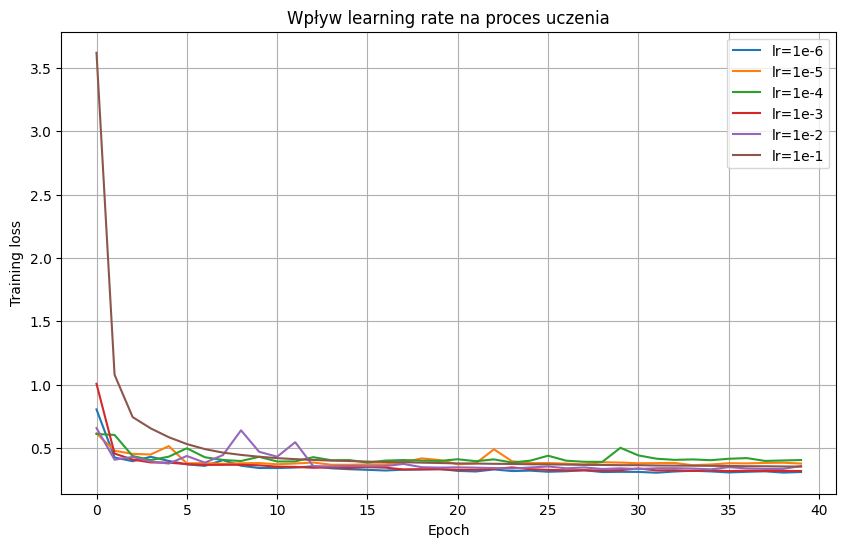

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i, history in enumerate(histories):
    plt.plot(history.history['loss'], label=f"lr=1e-{6-i}")
plt.xlabel("Epoch")
plt.ylabel("Training loss")
plt.title("Wpływ learning rate na proces uczenia")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import scikeras
from scikeras.wrappers import KerasRegressor

es = tf.keras.callbacks.EarlyStopping(patience=10, min_delta=1.0, verbose=1)
keras_reg = KerasRegressor(build_model, callbacks=[es])

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=5, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 11: early stopping
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step
[CV] END model__learning_rate=0.029900145107881672, model__n_hidden=1, model__n_neurons=71, model__optimizer=adam; total time=   4.7s


c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 11: early stopping
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step
[CV] END model__learning_rate=0.029900145107881672, model__n_hidden=1, model__n_neurons=71, model__optimizer=adam; total time=   4.7s


c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 12: early stopping
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step
[CV] END model__learning_rate=0.029900145107881672, model__n_hidden=1, model__n_neurons=71, model__optimizer=adam; total time=   5.3s
[CV] END model__learning_rate=0.002871679065414692, model__n_hidden=3, model__n_neurons=67, model__optimizer=momentum; total time=   0.0s
[CV] END model__learning_rate=0.002871679065414692, model__n_hidden=3, model__n_neurons=67, model__optimizer=momentum; total time=   0.0s
[CV] END model__learning_rate=0.002871679065414692, model__n_hidden=3, model__n_neurons=67, model__optimizer=momentum; total time=   0.0s
[CV] END model__learning_rate=0.029975026986410285, model__n_hidden=0, model__n_neurons=93, model__optimizer=nesterov; total time=   0.0s
[CV] END model__learning_rate=0.029975026986410285, model__n_hidden=0, model__n_neurons=93, model__optimizer=nesterov; total time=   0.0s
[CV] END model__learning_rate=0.029975026986410285, model__n_hidden=0, model__n_neurons=93, model__optimizer

c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  

Epoch 11: early stopping
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step
[CV] END model__learning_rate=0.0068829441209511495, model__n_hidden=1, model__n_neurons=89, model__optimizer=adam; total time=   4.8s


c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 11: early stopping
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step
[CV] END model__learning_rate=0.0068829441209511495, model__n_hidden=1, model__n_neurons=89, model__optimizer=adam; total time=   4.6s


c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 11: early stopping
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step
[CV] END model__learning_rate=0.0068829441209511495, model__n_hidden=1, model__n_neurons=89, model__optimizer=adam; total time=   4.7s


c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 15: early stopping
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step
[CV] END model__learning_rate=0.026298275542932386, model__n_hidden=0, model__n_neurons=71, model__optimizer=adam; total time=   5.6s


c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 12: early stopping
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step
[CV] END model__learning_rate=0.026298275542932386, model__n_hidden=0, model__n_neurons=71, model__optimizer=adam; total time=   4.5s


c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 45: early stopping
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step
[CV] END model__learning_rate=0.026298275542932386, model__n_hidden=0, model__n_neurons=71, model__optimizer=adam; total time=  15.7s


c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
6 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\scikeras\wrappers.py", line 925, in

Epoch 11: early stopping


RandomizedSearchCV(cv=3,
                   estimator=KerasRegressor(callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x0000023D4656DB50>], model=<function build_model at 0x0000023D3573A340>),
                   n_iter=5,
                   param_distributions={'model__learning_rate': [0.0019203716063485275,
                                                                 0.002102301937161312,
                                                                 0.016227589828561432,
                                                                 0.002182992803373879,
                                                                 0.001186150397633043,
                                                                 0.0...
                                                                 0.0018063278906506788,
                                                                 0.02664078271906803,
                                                                 0.02315962984821381,
                                                                 0.02025659302206904,
                                                                 0.012099857594382825,
                                                                 0.017786731114738694,
                                                                 0.007916090982598616, ...],
                                        'model__n_hidden': [0, 1, 2, 3],
                                        'model__n_neurons': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                                             27, 28, 29, 30, ...],
                                        'model__optimizer': ['sgd', 'adam',
                                                             'nesterov',
                                                             'momentum']},
                   verbose=2)

In [ ]:
print(rnd_search_cv.best_params_)
import pickle

with open("rnd_search_params.pkl", "wb") as file:
    pickle.dump(rnd_search_cv.best_params_, file)

with open("rnd_search_scikeras.pkl", "wb") as file:
    pickle.dump(rnd_search_cv, file)

{'model__optimizer': 'adam', 'model__n_neurons': 71, 'model__n_hidden': 1, 'model__learning_rate': 0.029900145107881672}


In [76]:
try:
    import keras_tuner as kt
except Exception:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "keras_tuner"])
    import keras_tuner as kt

def build_model_kt(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=3, default=2)
    n_neurons = hp.Int("n_neurons", min_value=1, max_value=100, default=30)
    learning_rate = hp.Float("learning_rate", min_value=1e-5, max_value=1e-2, sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(8,)))
    model.add(tf.keras.layers.Normalization())

    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(units=1))

    if optimizer == "sgd":
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == "adam":
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        raise ValueError("Nieznany optymalizator")
    
    model.compile(loss="mse", optimizer=opt, metrics=[tf.keras.metrics.MeanSquaredError()])
    return model

In [77]:
random_search_tuner = kt.RandomSearch(build_model_kt, objective="val_mean_squared_error", max_trials=10, overwrite=True, directory="my_california_housing", project_name="my_rnd_search", seed=42)

import os
root_logdir = os.path.join(random_search_tuner.project_dir, 'tensorboard')
tb = tf.keras.callbacks.TensorBoard(root_logdir)

In [78]:
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X_train)

random_search_tuner.search(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[tb])

Trial 10 Complete [00h 01m 28s]
val_mean_squared_error: 0.323580265045166

Best val_mean_squared_error So Far: 0.27369898557662964
Total elapsed time: 00h 14m 12s


In [79]:
print(random_search_tuner.get_best_hyperparameters(1)[0].values)

best_hps = random_search_tuner.get_best_hyperparameters(1)[0].values
with open("kt_search_params.pkl", "wb") as f:
    pickle.dump(best_hps, f)

best_model = random_search_tuner.get_best_models(1)[0]
best_model.save("kt_best_model.keras")

{'n_hidden': 3, 'n_neurons': 46, 'learning_rate': 0.00012932125878524408, 'optimizer': 'adam'}


c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
